In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Dataset Attributes

Input Variables: Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term

, Credit History,Property_Area
Target Variable: Loan_Status

# EDA of Dataset

In [3]:
df.shape

(614, 13)

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

String, int & float type data is present in dataset

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#To check null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

null values present in the dataset

In [10]:
#Finding features which are of integer datatype
int_type = [feature for feature in df.columns if df[feature].dtypes !='O']
print(int_type)
print("Number of columns with integer data type in adf is :" , len(int_type))

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Number of columns with integer data type in adf is : 5


In [11]:
#Finding datas which are of Object datatype
object_type = [feature for feature in df.columns if df[feature].dtypes =='O']
print(object_type)
print("Number of columns with object data type in adf is :" , len(object_type))

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Number of columns with object data type in adf is : 8


In [12]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

so majority of null values are there in the male

In [13]:
df['Gender'] = df['Gender'].fillna('Male')

In [14]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [15]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

Here majority is 'Yes' so we will replace the Null with 'Yes'.

In [16]:
df['Married'] = df['Married'].fillna('Yes')

In [17]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [18]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
df['Dependents'].isnull().sum()

15

Here the majority of people have 0 dependents , so we will replace the null values with 0 dependents.

In [20]:
df.Dependents = df['Dependents'].fillna('O')

In [21]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
O      15
Name: Dependents, dtype: int64

In [22]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

majoritry of the values are 'No' so we will replace the Null with 'No'.

In [23]:
df.Self_Employed = df['Self_Employed'].fillna('No')

In [24]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [25]:
df['LoanAmount'].isnull().sum()

22

In [26]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In LoanAmount we will replace the Null values with mean

In [27]:
df.LoanAmount = df['LoanAmount'].fillna((df.LoanAmount.mean()))

In [28]:
df['LoanAmount'].isnull().sum()

0

In [29]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [30]:
df['Loan_Amount_Term'].isnull().sum()

14

In [31]:
df['Loan_Amount_Term'].dtype

dtype('float64')

Here majority of Loan_Amount_Term has a value of 360.0 , So we will replace the Null values wit 360.0 only ,

In [32]:
df.Loan_Amount_Term = df['Loan_Amount_Term'].fillna(360.0)

In [33]:
df['Loan_Amount_Term'].isnull().sum()

0

In [34]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [35]:
df['Credit_History'].isnull().sum()

50

Here majority has 1.0 Credit_History so we will replace Null with 1.0.

In [37]:
df.Credit_History = df['Credit_History'].fillna(1.0)

In [38]:
df['Credit_History'].isnull().sum()

0

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [40]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

no null values in the datset

<AxesSubplot:>

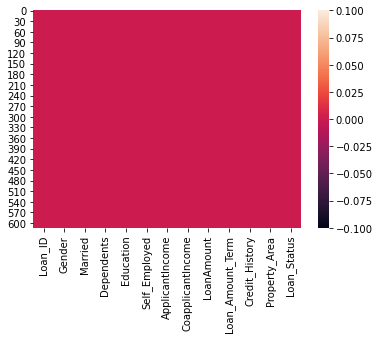

In [42]:
#to check missing values in data set via heat map # Data visualization
sns.heatmap(df.isnull())

Same color plot so no null value in the dataset

In [43]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [44]:
from sklearn.preprocessing import LabelEncoder


In [45]:
#convert categorical data into numerical data
cat_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [46]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [48]:
object_type = [feature for feature in df.columns if df[feature].dtypes =='O']
print(object_type)
print("Number of columns with object data type in adf is :" , len(object_type))

['Loan_ID']
Number of columns with object data type in adf is : 1


Loan_ID we can drop this as it is just an indexing , and will not constitute much in our future predictions

In [49]:
df = df.drop('Loan_ID' , axis = 1)

In [50]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


# Statistical Summary of Data

In [51]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.842020,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.120531,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Observation:
    mean value is more than 50th median in dependents,Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount & Property_Area
    2) There is large difference in max ApplicantIncome, CoapplicantIncome, LoanAmount.
    So outliers present in these columns

# Data Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

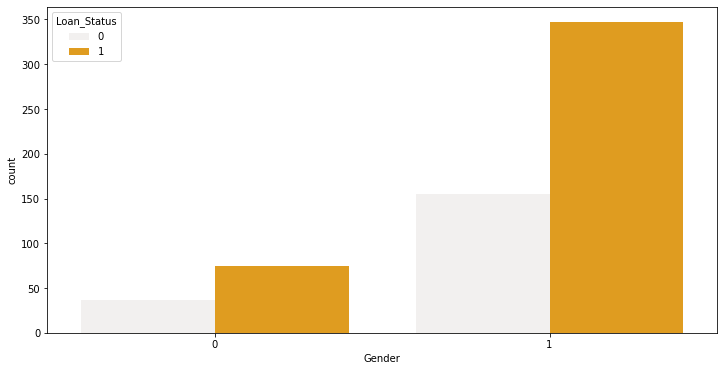

In [54]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Gender' , hue = 'Loan_Status' , data = df , dodge = True , color = 'orange')

Males (coded as 1) are getting more Loans as compared to women (coded as 0)

<AxesSubplot:xlabel='Married', ylabel='count'>

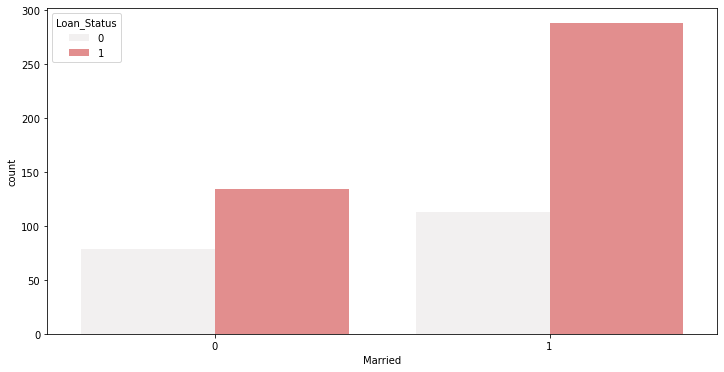

In [55]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Married' , hue = 'Loan_Status' , data = df , dodge = True , color = 'lightcoral')

married people have more chance for getting a Loan

<AxesSubplot:xlabel='Dependents', ylabel='count'>

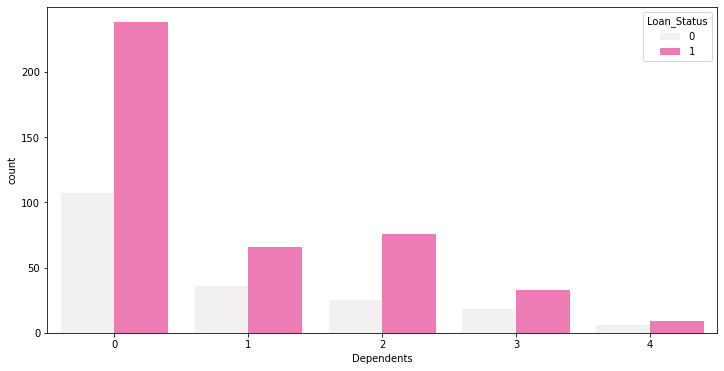

In [57]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Dependents' , hue = 'Loan_Status' , data = df , dodge = True , color = 'hotpink')

Observation: number of dependents are less , there's more chance of them getting a loan

<AxesSubplot:xlabel='Education', ylabel='count'>

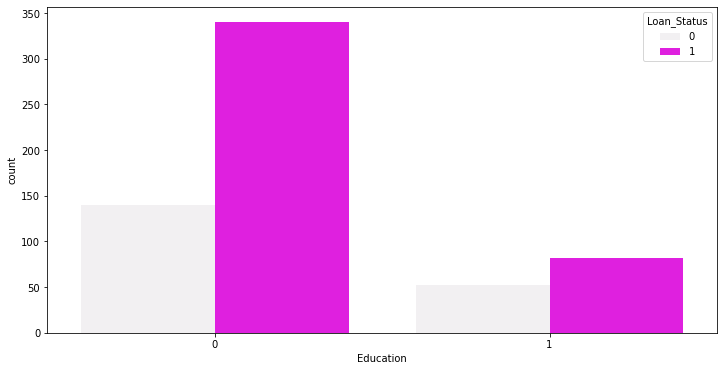

In [58]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Education' , hue = 'Loan_Status' , data = df , dodge = True , color = 'magenta')

Educated people have more chances of getting loan

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

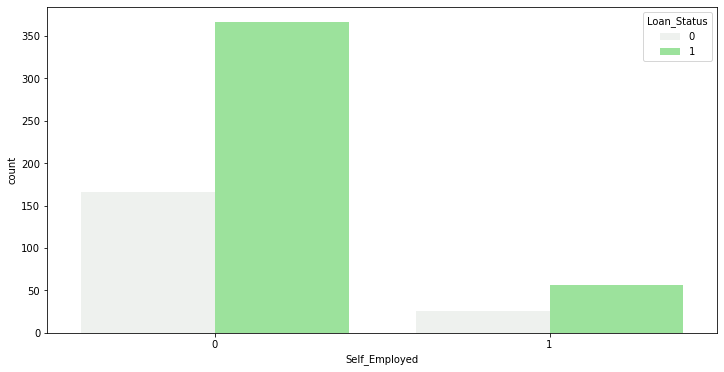

In [59]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Self_Employed' , hue = 'Loan_Status' , data = df , dodge = True , color = 'lightgreen')

self-employed has the less chance of getting a Loan as compared to Not Self-Employed

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

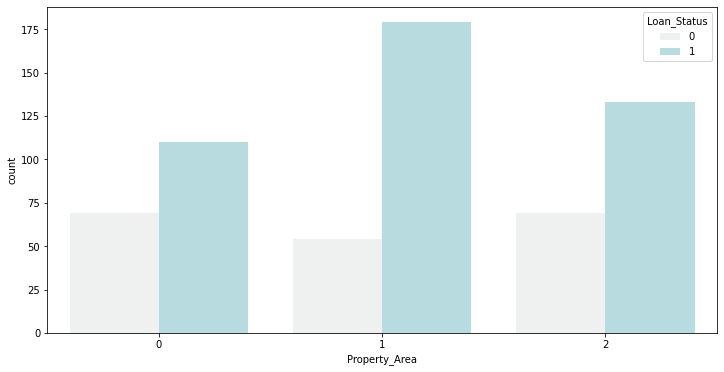

In [61]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Property_Area' , hue = 'Loan_Status' , data = df , dodge = True , color = 'powderblue')

# To check Outliers

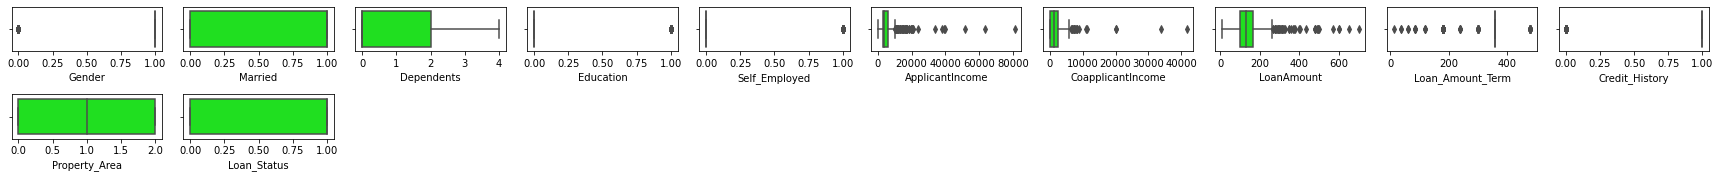

In [63]:
collist=df.columns.values
ncol=10
nrows=20
plt.figure(figsize=(24,24))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='lime',orient="V")
    plt.tight_layout()

# To remove outliers

In [64]:
from scipy.stats import zscore

In [66]:
z_score = np.abs(zscore(df))

In [67]:
print(np.where(z_score>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [68]:
print(np.where(z_score>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [69]:
df.shape

(614, 12)

In [70]:
df_wo  = df.drop([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604])

In [71]:
df_wo.shape

(577, 12)

In [72]:
df_wo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             577 non-null    int32  
 1   Married            577 non-null    int32  
 2   Dependents         577 non-null    int32  
 3   Education          577 non-null    int32  
 4   Self_Employed      577 non-null    int32  
 5   ApplicantIncome    577 non-null    int64  
 6   CoapplicantIncome  577 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   577 non-null    float64
 9   Credit_History     577 non-null    float64
 10  Property_Area      577 non-null    int32  
 11  Loan_Status        577 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 42.8 KB


Outliers removed

# To check correlation

In [73]:
dfcor=df_wo.corr()

In [74]:
dfcor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.164239,0.045696,-0.006207,0.026943,0.190543,0.159957,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.310382,0.024817,-0.015779,-0.008567,0.237322,0.165147,-0.127348,0.019308,0.010595,0.089026
Dependents,0.164239,0.310382,1.000000,0.071052,0.041618,0.085251,-0.042844,0.112151,-0.063578,-0.066324,0.037760,-0.002160
Education,0.045696,0.024817,0.071052,1.000000,-0.007139,-0.166400,-0.037780,-0.146598,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.041618,-0.007139,1.000000,0.250665,-0.039572,0.121892,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.026943,-0.008567,0.085251,-0.166400,0.250665,1.000000,-0.220975,0.442394,-0.052101,0.036664,-0.003641,-0.005003
CoapplicantIncome,0.190543,0.237322,-0.042844,-0.037780,-0.039572,-0.220975,1.000000,0.309479,-0.058726,-0.011102,-0.093505,0.045009
LoanAmount,0.159957,0.165147,0.112151,-0.146598,0.121892,0.442394,0.309479,1.000000,0.037302,0.008541,-0.075749,-0.035289
Loan_Amount_Term,-0.104983,-0.127348,-0.063578,-0.090523,-0.032914,-0.052101,-0.058726,0.037302,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.066324,-0.075217,-0.016390,0.036664,-0.011102,0.008541,0.027392,1.000000,-0.008121,0.560936


<AxesSubplot:>

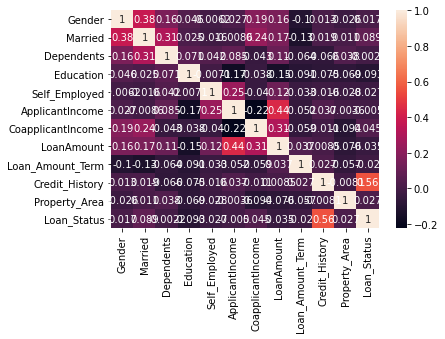

In [75]:
sns.heatmap(dfcor, annot=True)

Observation: predictor variables are not very much correlated with each other , so we will not require PCA

# To check Skewness

In [77]:
x_predictor = df_wo.drop('Loan_Status', axis = 1)
x_predictor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [78]:
x_predictor.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.134133
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

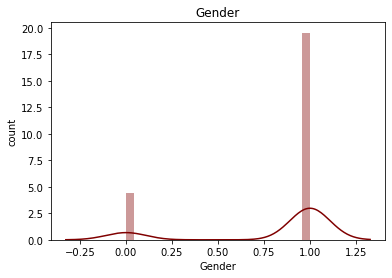

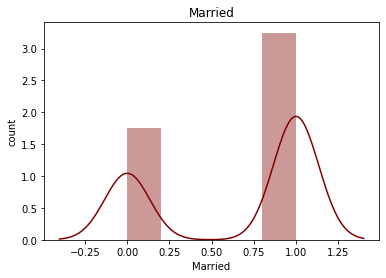

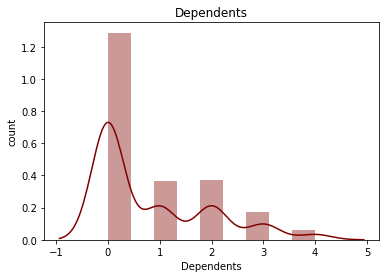

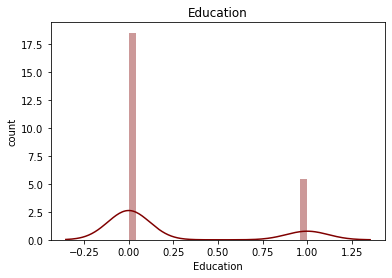

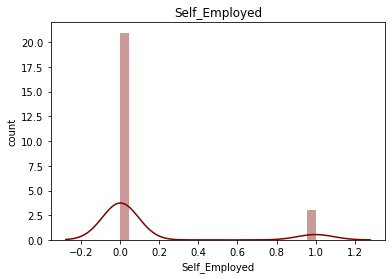

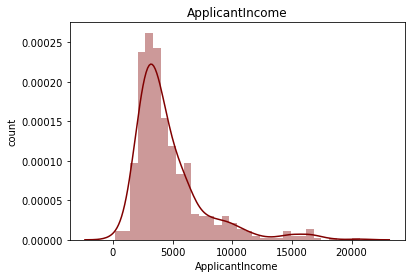

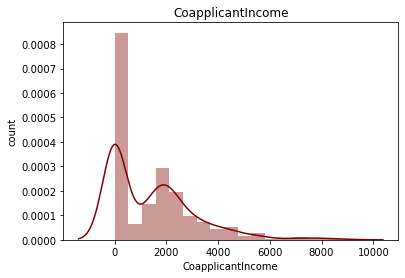

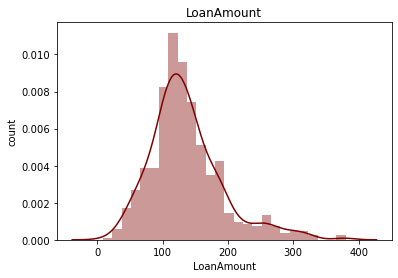

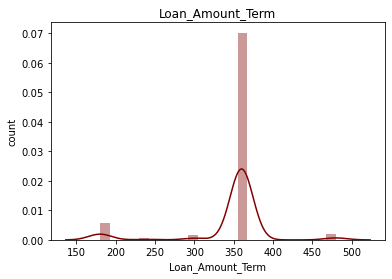

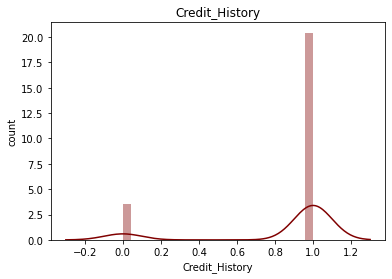

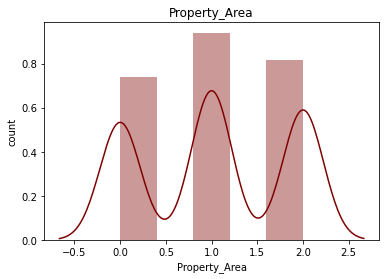

In [79]:
for feature in x_predictor :
    sns.distplot(x_predictor[feature] , kde = True , color = 'maroon' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

In [80]:
#To remove skewness
from sklearn.preprocessing import PowerTransformer

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
powert = PowerTransformer( method = 'yeo-johnson' , standardize = False)
x_t = powert.fit_transform(x_predictor)

In [83]:
x_trans = pd.DataFrame(x_t , columns = x_predictor.columns)
x_trans

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,24.870137,0.000000,-0.000000,-0.000000,-0.000000,11.194697,0.000000,13.201111,1.681817e+07,80.55264,1.690589
1,24.870137,2.081131,0.472409,-0.000000,-0.000000,10.799279,9.832468,12.482026,1.681817e+07,80.55264,0.000000
2,24.870137,2.081131,-0.000000,-0.000000,0.087923,10.125222,0.000000,9.390267,1.681817e+07,80.55264,1.690589
3,24.870137,2.081131,-0.000000,0.166246,-0.000000,9.891003,10.631416,12.148447,1.681817e+07,80.55264,1.690589
4,24.870137,0.000000,-0.000000,-0.000000,-0.000000,11.236333,0.000000,12.996190,1.681817e+07,80.55264,1.690589
...,...,...,...,...,...,...,...,...,...,...,...
572,0.000000,0.000000,-0.000000,-0.000000,-0.000000,10.071991,0.000000,9.697075,1.681817e+07,80.55264,0.000000
573,24.870137,2.081131,0.679867,-0.000000,-0.000000,10.622891,0.000000,7.486669,2.101446e+06,80.55264,0.000000
574,24.870137,2.081131,0.472409,-0.000000,-0.000000,11.725354,6.825818,16.498185,1.681817e+07,80.55264,1.690589
575,24.870137,2.081131,0.613735,-0.000000,-0.000000,11.621649,0.000000,14.599374,1.681817e+07,80.55264,1.690589


In [84]:
x_trans.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.405342
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.155094
dtype: float64

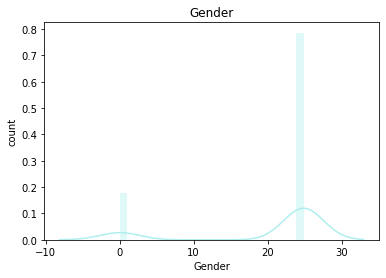

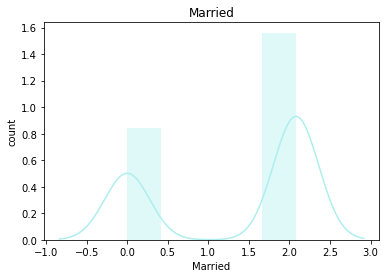

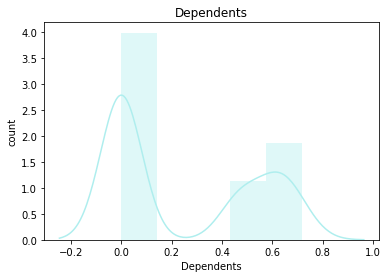

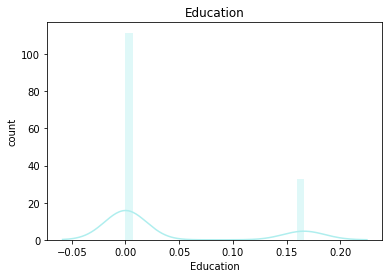

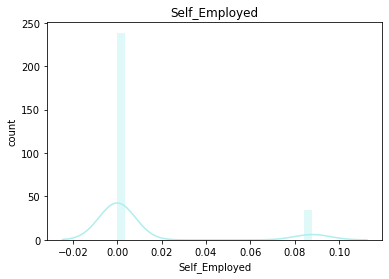

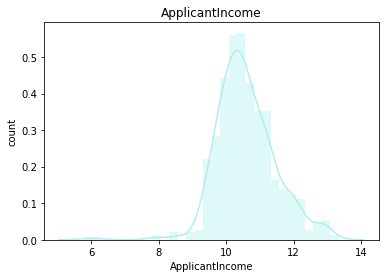

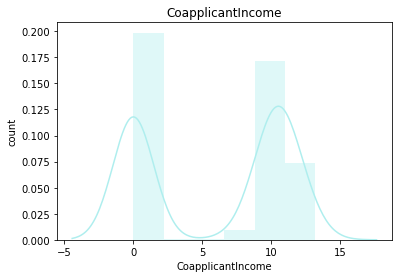

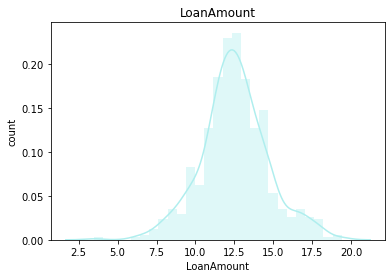

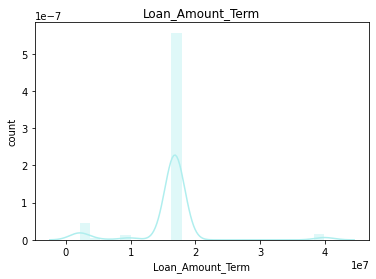

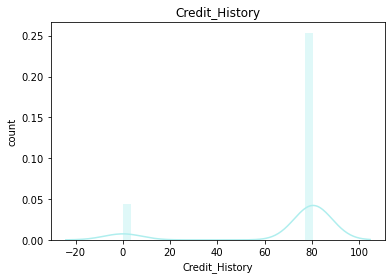

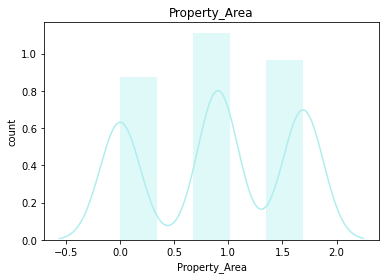

In [85]:
for feature in x_trans :
    sns.distplot(x_trans[feature] , kde = True , color = 'paleturquoise' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

Now no skewness is present in dataset.

In [87]:
for i in x_trans :
    print(i , max(x_trans[i]) - min(x_trans[i]))

Gender 24.87013733506448
Married 2.081131060180808
Dependents 0.7176728487809261
Education 0.1662459515553527
Self_Employed 0.08792340599638356
ApplicantIncome 7.529739652294087
CoapplicantIncome 13.193057655265918
LoanAmount 15.884284444447664
Loan_Amount_Term 37825086.25748738
Credit_History 80.5526400060219
Property_Area 1.6905889394348181


absorbable difference between values of different columns , So we will scale them

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_s = scaler.fit_transform(x_trans)
x_s

array([[ 0.47713685, -1.36251079, -0.84821559, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.7695393 , ...,  0.13078824,
         0.41851254, -1.34019905],
       [ 0.47713685,  0.73393914, -0.84821559, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.7695393 , ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.25350897, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.84821559, ...,  0.13078824,
        -2.38941464,  0.01546372]])

In [89]:
x_sc = pd.DataFrame(x_s , columns = x_trans.columns)
x_sc

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.848216,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.130788,0.418513,1.194806
1,0.477137,0.733939,0.769539,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.130788,0.418513,-1.340199
2,0.477137,0.733939,-0.848216,-0.541961,2.627567,-0.527201,-1.122446,-1.443112,0.130788,0.418513,1.194806
3,0.477137,0.733939,-0.848216,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.130788,0.418513,1.194806
4,0.477137,-1.362511,-0.848216,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.130788,0.418513,1.194806
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.848216,-0.541961,-0.380580,-0.587375,-1.122446,-1.301481,0.130788,0.418513,-1.340199
573,0.477137,0.733939,1.479978,-0.541961,-0.380580,0.035386,-1.122446,-2.321865,-2.562700,0.418513,-1.340199
574,0.477137,0.733939,0.769539,-0.541961,-0.380580,1.281658,0.173344,1.838099,0.130788,0.418513,1.194806
575,0.477137,0.733939,1.253509,-0.541961,-0.380580,1.164426,-1.122446,0.961555,0.130788,0.418513,1.194806


<AxesSubplot:>

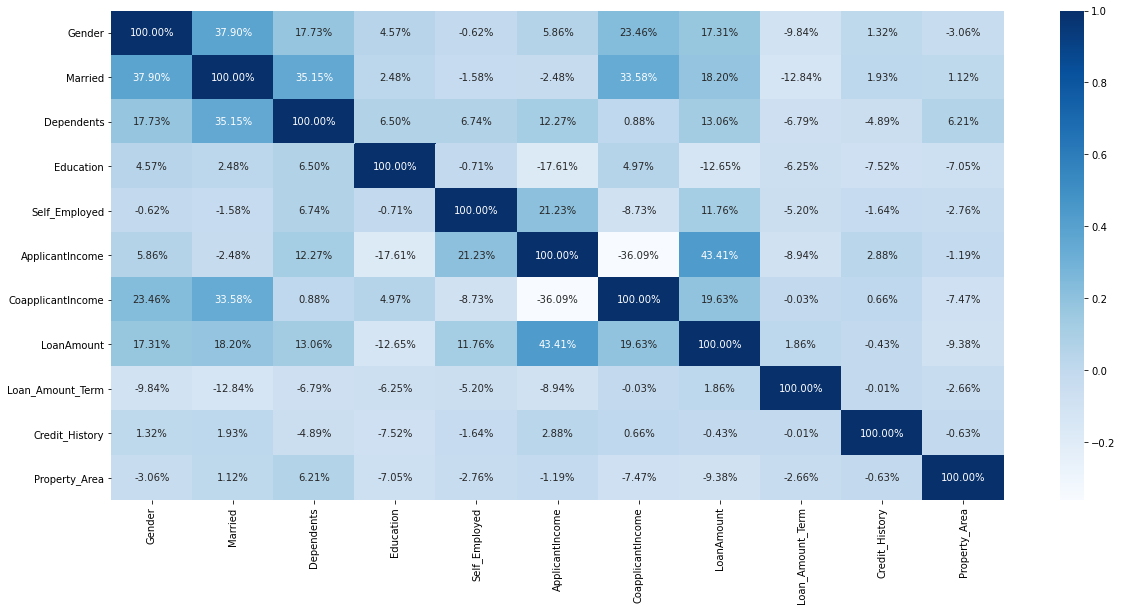

In [90]:
plt.figure(figsize= (20,9))
sns.heatmap(x_sc.corr() , cmap = 'Blues' , annot = True , fmt = '.2%')

predictor variables are not very much correlated with each other , so we will not require PCA for this

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
# treating target variable
y = df_wo.iloc[: , -1 :]

In [98]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


# Model Fitting & Testing

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve


In [100]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    predrf=rf.predict(X_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

Best accuracy is  0.8850574712643678 on random state  86


In [101]:
#Training on different Classifier models
models = [LogisticRegression(),
             KNeighborsClassifier(),
             SVC(),
             RandomForestClassifier(),
             AdaBoostClassifier(),
             DecisionTreeClassifier(),
             GaussianNB()
         ]

names = ['LogisticRegression','K Nearest Neighbor','Support Vector Classifier','Random Forest','AdaBoost Classifier',
         'Decision Tree Classifier' , 'GaussianNB' ]

for model,name in zip(models,names):
    fit = model.fit(X_train , y_train)
    y_predicted = model.predict(X_test)
    score = model.score(X_train , y_train)
    print(name ," - " ,score)
    print("Accuracy:",accuracy_score(y_predicted, y_test))
    print("Confusion Matrix:\n",confusion_matrix(y_predicted, y_test))
    print("\t\tclassification report")
    print("-" * 52)
    print(classification_report(y_predicted , y_test))


LogisticRegression  -  0.8238213399503722
Accuracy: 0.8045977011494253
Confusion Matrix:
 [[ 22   2]
 [ 32 118]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.41      0.92      0.56        24
           1       0.98      0.79      0.87       150

    accuracy                           0.80       174
   macro avg       0.70      0.85      0.72       174
weighted avg       0.90      0.80      0.83       174

K Nearest Neighbor  -  0.8461538461538461
Accuracy: 0.7873563218390804
Confusion Matrix:
 [[ 23   6]
 [ 31 114]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.43      0.79      0.55        29
           1       0.95      0.79      0.86       145

    accuracy                           0.79       174
   macro avg       0.69      0.79      0.71       174
weighted avg       0.

SVC has the best score and accuracy scores.So use only this model for our further predictions

In [102]:
#Support Vector Classifier (SVC)
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=i)
    sv = SVC()
    sv.fit(X_train,y_train)
    predsv = sv.predict(X_test)
    acc=accuracy_score(y_test,predsv)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

Best accuracy is  0.8908045977011494 on random state  12


In [103]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=12)
sv = SVC()
sv.fit(X_train , y_train)
sv_predicted = sv.predict(X_test)
score = sv.score(X_train , y_train)

print(SVC() ," - " ,score)
print("Accuracy:",accuracy_score(sv_predicted, y_test))
print("Confusion Matrix:\n",confusion_matrix(sv_predicted, y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(sv_predicted , y_test))

SVC()  -  0.8114143920595533
Accuracy: 0.8908045977011494
Confusion Matrix:
 [[ 24   1]
 [ 18 131]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.96      0.72        25
           1       0.99      0.88      0.93       149

    accuracy                           0.89       174
   macro avg       0.78      0.92      0.82       174
weighted avg       0.93      0.89      0.90       174



>1, train: 0.667, test: 0.759
>2, train: 0.789, test: 0.885
>3, train: 0.792, test: 0.885
>4, train: 0.794, test: 0.879
>5, train: 0.809, test: 0.885
>6, train: 0.836, test: 0.874
>7, train: 0.883, test: 0.868
>8, train: 0.898, test: 0.868
>9, train: 0.918, test: 0.868
>10, train: 0.965, test: 0.856
>11, train: 0.983, test: 0.862
>12, train: 0.993, test: 0.851
>13, train: 1.000, test: 0.851
>14, train: 1.000, test: 0.862
>15, train: 1.000, test: 0.845
>16, train: 0.998, test: 0.822
>17, train: 1.000, test: 0.822
>18, train: 1.000, test: 0.828
>19, train: 1.000, test: 0.816
>20, train: 1.000, test: 0.839


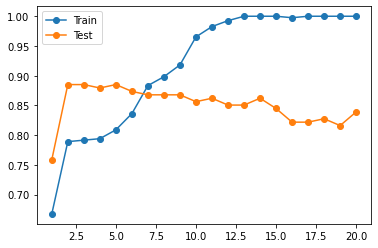

In [105]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:

    model = RandomForestClassifier(max_depth=i)
    
    model.fit(X_train, y_train)
   
    train_y_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train,train_y_pred)
    train_scores.append(train_accuracy)
   
    test_y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_accuracy)
    #printing test and accuracy scores.
    print('>%d, train: %.3f, test: %.3f' % (i, train_accuracy, test_accuracy))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

Training Random Forest Calssifier again

In [108]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    predrf = rf.predict(X_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

Best accuracy is  0.867816091954023 on random state  86


In [109]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=24)
rf = RandomForestClassifier()
rf.fit(X_train , y_train)
rf_predicted = rf.predict(X_test)
score = rf.score(X_train , y_train)

print(RandomForestClassifier() ," - " ,score)
print("Accuracy:",accuracy_score(rf_predicted, y_test))
print("Confusion Matrix:\n",confusion_matrix(rf_predicted, y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(rf_predicted , y_test))

RandomForestClassifier()  -  1.0
Accuracy: 0.8275862068965517
Confusion Matrix:
 [[ 25   5]
 [ 25 119]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.83      0.62        30
           1       0.96      0.83      0.89       144

    accuracy                           0.83       174
   macro avg       0.73      0.83      0.76       174
weighted avg       0.88      0.83      0.84       174



In [110]:
X_train,X_test,y_train,y_test=train_test_split(x_sc,y,test_size=.30,random_state=24)

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [111]:
#Confusion Matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 65,  64],
       [ 28, 246]], dtype=int64)

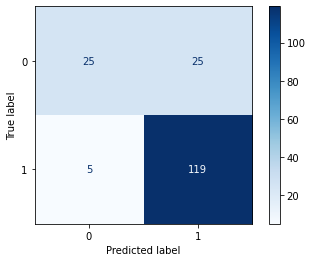

In [112]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf ,X_test , y_test , cmap = 'Blues' )

In [113]:
#recall & precision
print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7935483870967742
Recall: 0.8978102189781022


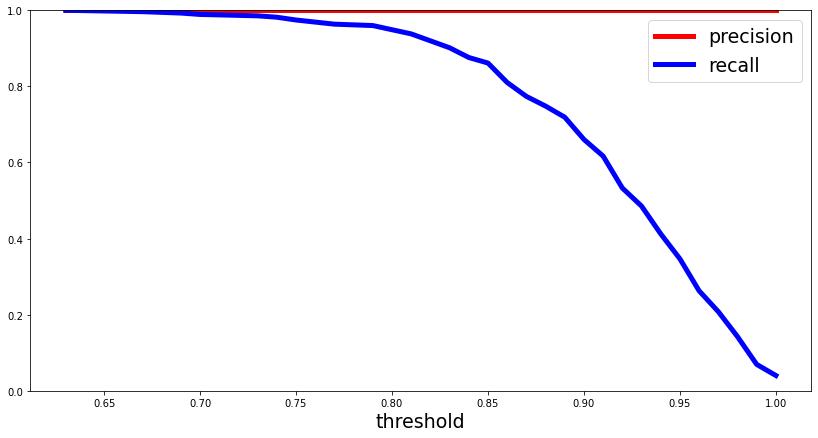

In [114]:
#PLotting y_test and y_predicted for our datset
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

# ROC_AUC Curve

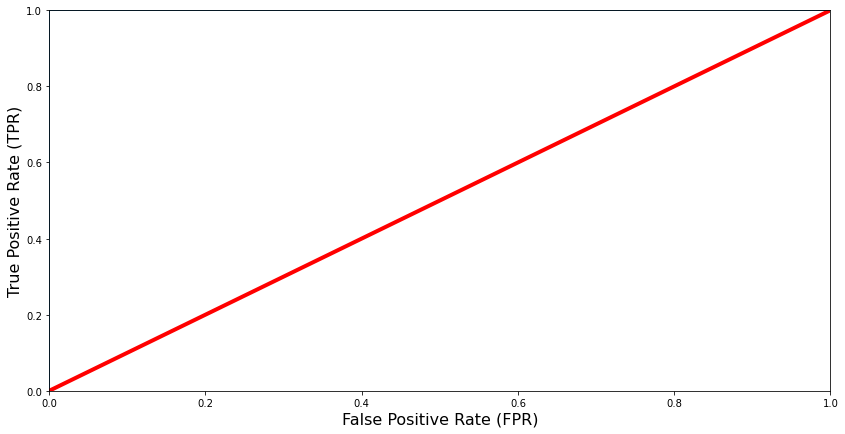

In [116]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

# Model Saving

In [117]:
import joblib
joblib.dump(rf , 'RandomForestClassifier')

['RandomForestClassifier']